In [2]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
import librosa.display
import glob

from kaspar_sizer import total_size
from projaudio import read_songs

plt.style.use('seaborn-muted')
%matplotlib inline

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
songs = read_songs(verbose=True)

Found 2 file(s) ending with 'mp3', 'm4a' in '/' folder.


In [7]:
song_names = list(songs.keys())
song_names

['Led Zeppelin - Stairway To Heaven', 'Taylor Swift - Shake It Off']

In [14]:
from projaudio import play_button

song = songs[song_names[0]]
audio, sr = song['y'], song['sr']

play_button(audio, sr, 6, 36)

In [ ]:
from projaudio import chromaplot
chromaplot(y, sr, 0, 14)

In [ ]:
#total_size(songs)

In [20]:
contrast = librosa.feature.spectral_contrast(audio, sr)

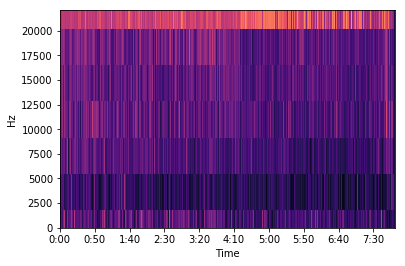

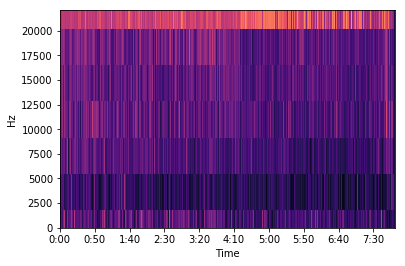

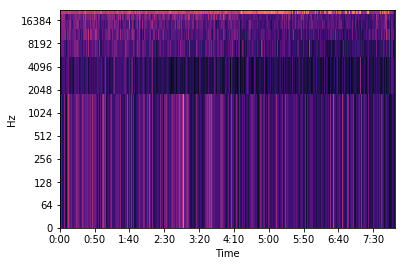

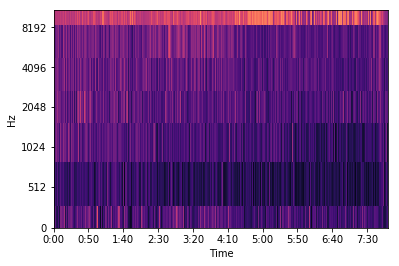

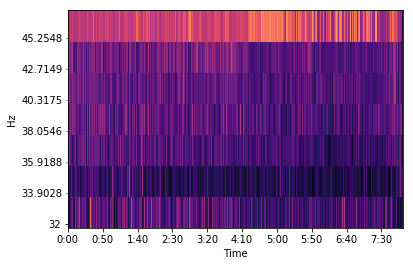

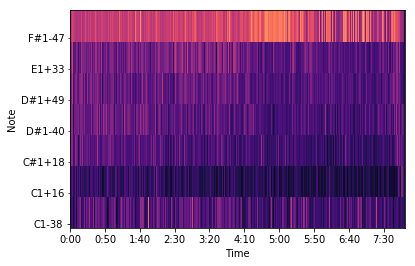

In [23]:
for label in ['linear', 'hz', 'log', 'mel','cqt_hz','cqt_note']:
    librosa.display.specshow(contrast, sr=sr, x_axis='time', y_axis=label)
    plt.show();

In [ ]:
features = [method for method in dir(librosa.feature) if '__' not in method]
commands = "".join('df["'+method+'"] = librosa.feature.'+method+'(audio, sr),\n' for method in features)
print(commands)

In [ ]:
df = pd.DataFrame(audio)

def build_features(audio=audio):
    df["chroma_cens"] = librosa.feature.chroma_cens(audio, sr),
    df["chroma_cqt"] = librosa.feature.chroma_cqt(audio, sr),
    df["chroma_stft"] = librosa.feature.chroma_stft(audio, sr),
    df["delta"] = librosa.feature.delta(audio, sr),
    df["melspectrogram"] = librosa.feature.melspectrogram(audio, sr),
    df["mfcc"] = librosa.feature.mfcc(audio, sr),
    df["poly_features"] = librosa.feature.poly_features(audio, sr),
    df["rhythm"] = librosa.feature.rhythm(audio, sr),
    df["rms"] = librosa.feature.rms(audio, sr),
    df["rmse"] = librosa.feature.rmse(audio, sr),
    df["spectral"] = librosa.feature.spectral(audio, sr),
    df["spectral_bandwidth"] = librosa.feature.spectral_bandwidth(audio, sr),
    df["spectral_centroid"] = librosa.feature.spectral_centroid(audio, sr),
    df["spectral_contrast"] = librosa.feature.spectral_contrast(audio, sr),
    df["spectral_flatness"] = librosa.feature.spectral_flatness(audio, sr),
    df["spectral_rolloff"] = librosa.feature.spectral_rolloff(audio, sr),
    df["stack_memory"] = librosa.feature.stack_memory(audio, sr),
    df["tempogram"] = librosa.feature.tempogram(audio, sr),
    df["tonnetz"] = librosa.feature.tonnetz(audio, sr),
    df["utils"] = librosa.feature.utils(audio, sr),
    df["zero_crossing_rate"] = librosa.feature.zero_crossing_rate(audio, sr)

In [ ]:
build_features()

In [ ]:
df.head()

In [ ]:
df.plot()

In [ ]:
S = librosa.feature.melspectrogram(audio, sr=sr, n_mels=128)

In [ ]:
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+0.2f dB")
plt.tight_layout()

In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(audio)

In [ ]:
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [ ]:
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

In [ ]:
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
def get_key(chroma=C):
    pass

In [ ]:
librosa.beat.tempo(audio)
tempo, beat = librosa.beat.beat_track(audio)
beat.shape

In [ ]:
songs_df = pd.DataFrame({'song':"sample song", 'artist':'librosa', 'audio':[audio]})

songs_df.assign(tempo=librosa.beat.tempo(audio))

In [ ]:
audio.shape

In [ ]:
C.shape